# Import 

In [1]:
# 3d library
import open3d as o3d

In [2]:
# image elaboration libraries

#!pip install Pillow 
#!pip install imageio
#!pip install cv2-plt-imshow
from IPython.display import Image
from imageio import imread
from imageio import imwrite
from PIL import Image
from IPython.display import Image as Im

import cv2
import matplotlib.pyplot as plt
from cv2_plt_imshow import cv2_plt_imshow, plt_format

In [3]:
# others
import numpy as np
import os
import random as myrand

from tqdm.notebook import tqdm# progress bar
import sys
from time import time 
import copy

In [4]:
delimiter = ', ' 
myrand.seed(42)
dash = '-'*80

In [5]:
from datetime import date
from datetime import datetime
import pickle as pkl

# os and directories

In [6]:
from sys import platform
platform

'darwin'

In [7]:
os.chdir('/Users/ariannataormina/Documents/GitHub/02507-Project_work_Image_Analysis_and_Computer_Graphics/')
cwd = os.getcwd()
cwd

'/Users/ariannataormina/Documents/GitHub/02507-Project_work_Image_Analysis_and_Computer_Graphics'

In [8]:
if platform == "linux" or platform == "linux2":
    # linux
    print ("linux to be implemented")
elif platform == "darwin":
    # OS X
    ROOT= cwd +"/data" #mac
    os.chdir(ROOT)
    os.listdir(ROOT)
    !ls {ROOT}
elif platform == "win32":
    # Windows
    ROOT='ARI_HD:\\' #w10
    os.chdir(ROOT)
    os.listdir(ROOT)
    !dir {ROOT} 

0601-stitch_19-20.pcd
0601-transformation_result_icp.pkl
0601-transformation_result_icp_safe_copy.pkl
10012021-21h37m05s-stitch_allpc_downsampled_upper_external.pcd
10012021-22h26m24s-stitch_allpc_downsampled_upper_external_internal.pcd
10012021-22h44m41s-stitch_allpc_downsampled_upper_external.pcd
DepthCamera_2021-01-10-22-37-11.json
DepthCapture_2021-01-10-22-37-11.png
Radius_oulier_removal_fov=1.png
Radius_oulier_removal_fov=10.png
Radius_oulier_removal_fov=15.png
Radius_oulier_removal_fov=3.png
RenderOption_2021-01-10-13-54-08.json
RenderOption_2021-01-10-13-54-21.json
RenderOption_2021-01-10-14-08-33.json
RenderOption_2021-01-10-14-09-09.json
RenderOption_2021-01-10-14-11-03.json
RenderOption_2021-01-10-14-15-31.json
RenderOption_2021-01-10-14-28-07.json
RenderOption_2021-01-10-15-20-48.json
RenderOption_2021-01-10-16-10-03.json
RenderOption_2021-01-10-16-40-36.json
RenderOption_2021-01-11-12-03-13.json
RenderOption_2021-01-11-12-22-53.json
ScreenCamera_2021-01-08-10-35-04.json
Sc

In [9]:
img_folder = ROOT +"/imgfolder"
ply_folder = ROOT +"/plyfolder"

In [10]:
!ls {img_folder}

image0.png  image05.png image10.png image15.png image20.png image25.png
image01.png image06.png image11.png image16.png image21.png image26.png
image02.png image07.png image12.png image17.png image22.png image27.png
image03.png image08.png image13.png image18.png image23.png image28.png
image04.png image09.png image14.png image19.png image24.png image29.png


In [11]:
!ls {ply_folder}

points0.ply  points05.ply points10.ply points15.ply points20.ply points25.ply
points01.ply points06.ply points11.ply points16.ply points21.ply points26.ply
points02.ply points07.ply points12.ply points17.ply points22.ply points27.ply
points03.ply points08.ply points13.ply points18.ply points23.ply points28.ply
points04.ply points09.ply points14.ply points19.ply points24.ply points29.ply


In [12]:
all_images = sorted(os.listdir(img_folder))
all_ply = sorted(os.listdir(ply_folder))

In [13]:
all_paths_images = [img_folder+"/"+all_images[idx] for idx in range(len(all_images))]
all_paths_ply = [ply_folder+"/"+all_ply[idx] for idx in range(len(all_ply))]

In [14]:
img_folder+"/"+all_images[0]

'/Users/ariannataormina/Documents/GitHub/02507-Project_work_Image_Analysis_and_Computer_Graphics/data/imgfolder/image0.png'

# Sort sequences appropriately

Given the initial 10 teeth: 
- external images are sorted as 0 to 9
- internal images are sorted as 9 to 0
- upper images are sorted as 0 to 9

need to reverse the order of internal images and ply


In [15]:
num_teeth = 10
external_img = [cv2.imread(path) for path in all_paths_images[:num_teeth]]
internal_img = [cv2.imread(path) for path in all_paths_images[num_teeth:2*num_teeth]]
upper_img = [cv2.imread(path) for path in all_paths_images[-num_teeth:]]

In [16]:
# reverse in place the internal ones
internal_img.reverse()

# plot tooth

In [17]:
t = 1

In [18]:
def display_one_tooth(images, toothnum = 0, rows = 1, cols=3, print_suptitle = False, mysuptitle = ""):
    fig, axes = plt.subplots(nrows=rows,ncols=cols,squeeze=False,figsize=(30, 30))
    for i in range(rows):
        for j in range(cols):
            axes[i][j].imshow(plt_format(images[j]))
            #axes[i][j].set_xlabel("tooth_{}".format(toothnum))
            #axes[i][j].axis('off')
    
    cols_title = ['{} View'.format(col) for col in ['External', 'Internal', 'Upper']]
    for ax, c in zip(axes[0], cols_title):
        ax.set_title(c, rotation=0, fontsize=40)
        
    rows_title = ["Tooth_{}             ".format(toothnum)]
    for ax, r in zip(axes[:,0], rows_title):
        ax.set_ylabel(r, rotation=0, fontsize=40)
        
    if print_suptitle == True:
        fig.suptitle("{}".format(mysuptitle),fontsize=40)
    
    fig.tight_layout()    
    plt.show()

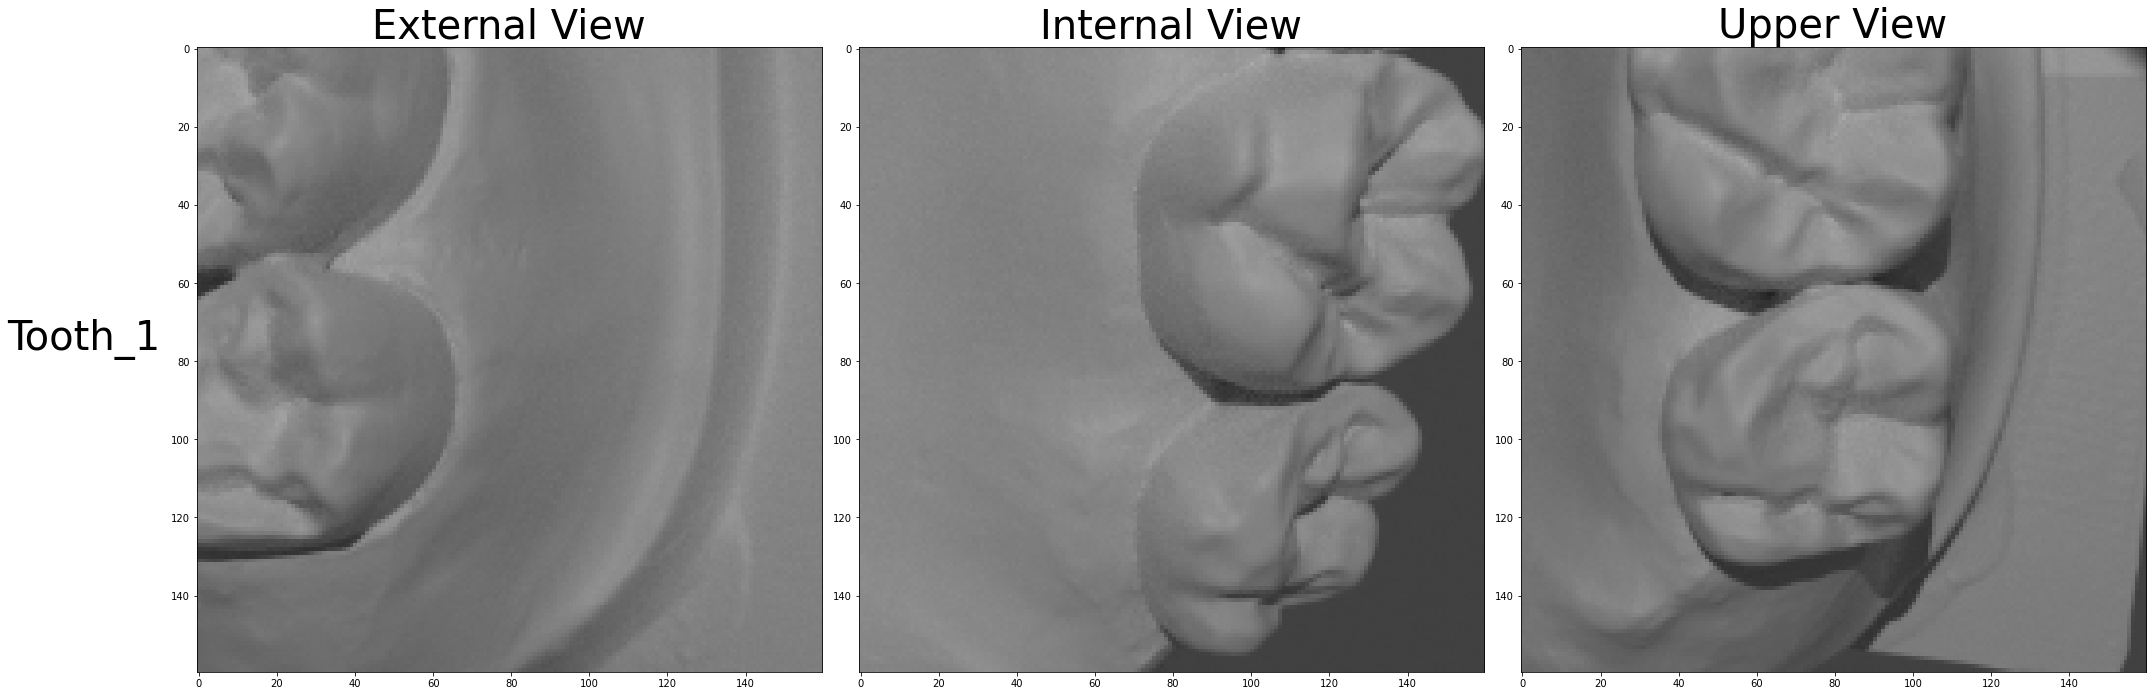

In [19]:
one_tooth_images= [external_img[t],internal_img[t],upper_img[t]]
display_one_tooth(one_tooth_images,toothnum = t, rows = 1, cols=len(one_tooth_images))


# plot multiple teeth

In [20]:
def display_multiple_teeth(images, T, rows = 1, cols=3, print_suptitle = False, mysuptitle = ""):
    
    fig, axes = plt.subplots(nrows=rows,ncols=cols,squeeze=False,figsize=(30, 30))
    for i in range(rows):
        for j in range(cols):
            axes[i][j].imshow(plt_format(images[j][i]))
            #axes[i][j].set_xlabel("tooth_{}".format(toothnum))
            #axes[i][j].axis('off')
    
    cols_title = ['{} View'.format(col) for col in ['External', 'Internal', 'Upper']]
    for ax, c in zip(axes[0], cols_title):
        ax.set_title(c, rotation=0, fontsize=40)
        
    rows_title = ["Tooth_{}             ".format(toothnum) for toothnum in list(range(T[0],T[1]))]
    for ax, r in zip(axes[:,0], rows_title):
        ax.set_ylabel(r, rotation=0, fontsize=40)
        
    if print_suptitle == True:
        fig.suptitle("{}".format(mysuptitle),fontsize=40)
    
    fig.tight_layout()    
    plt.show()

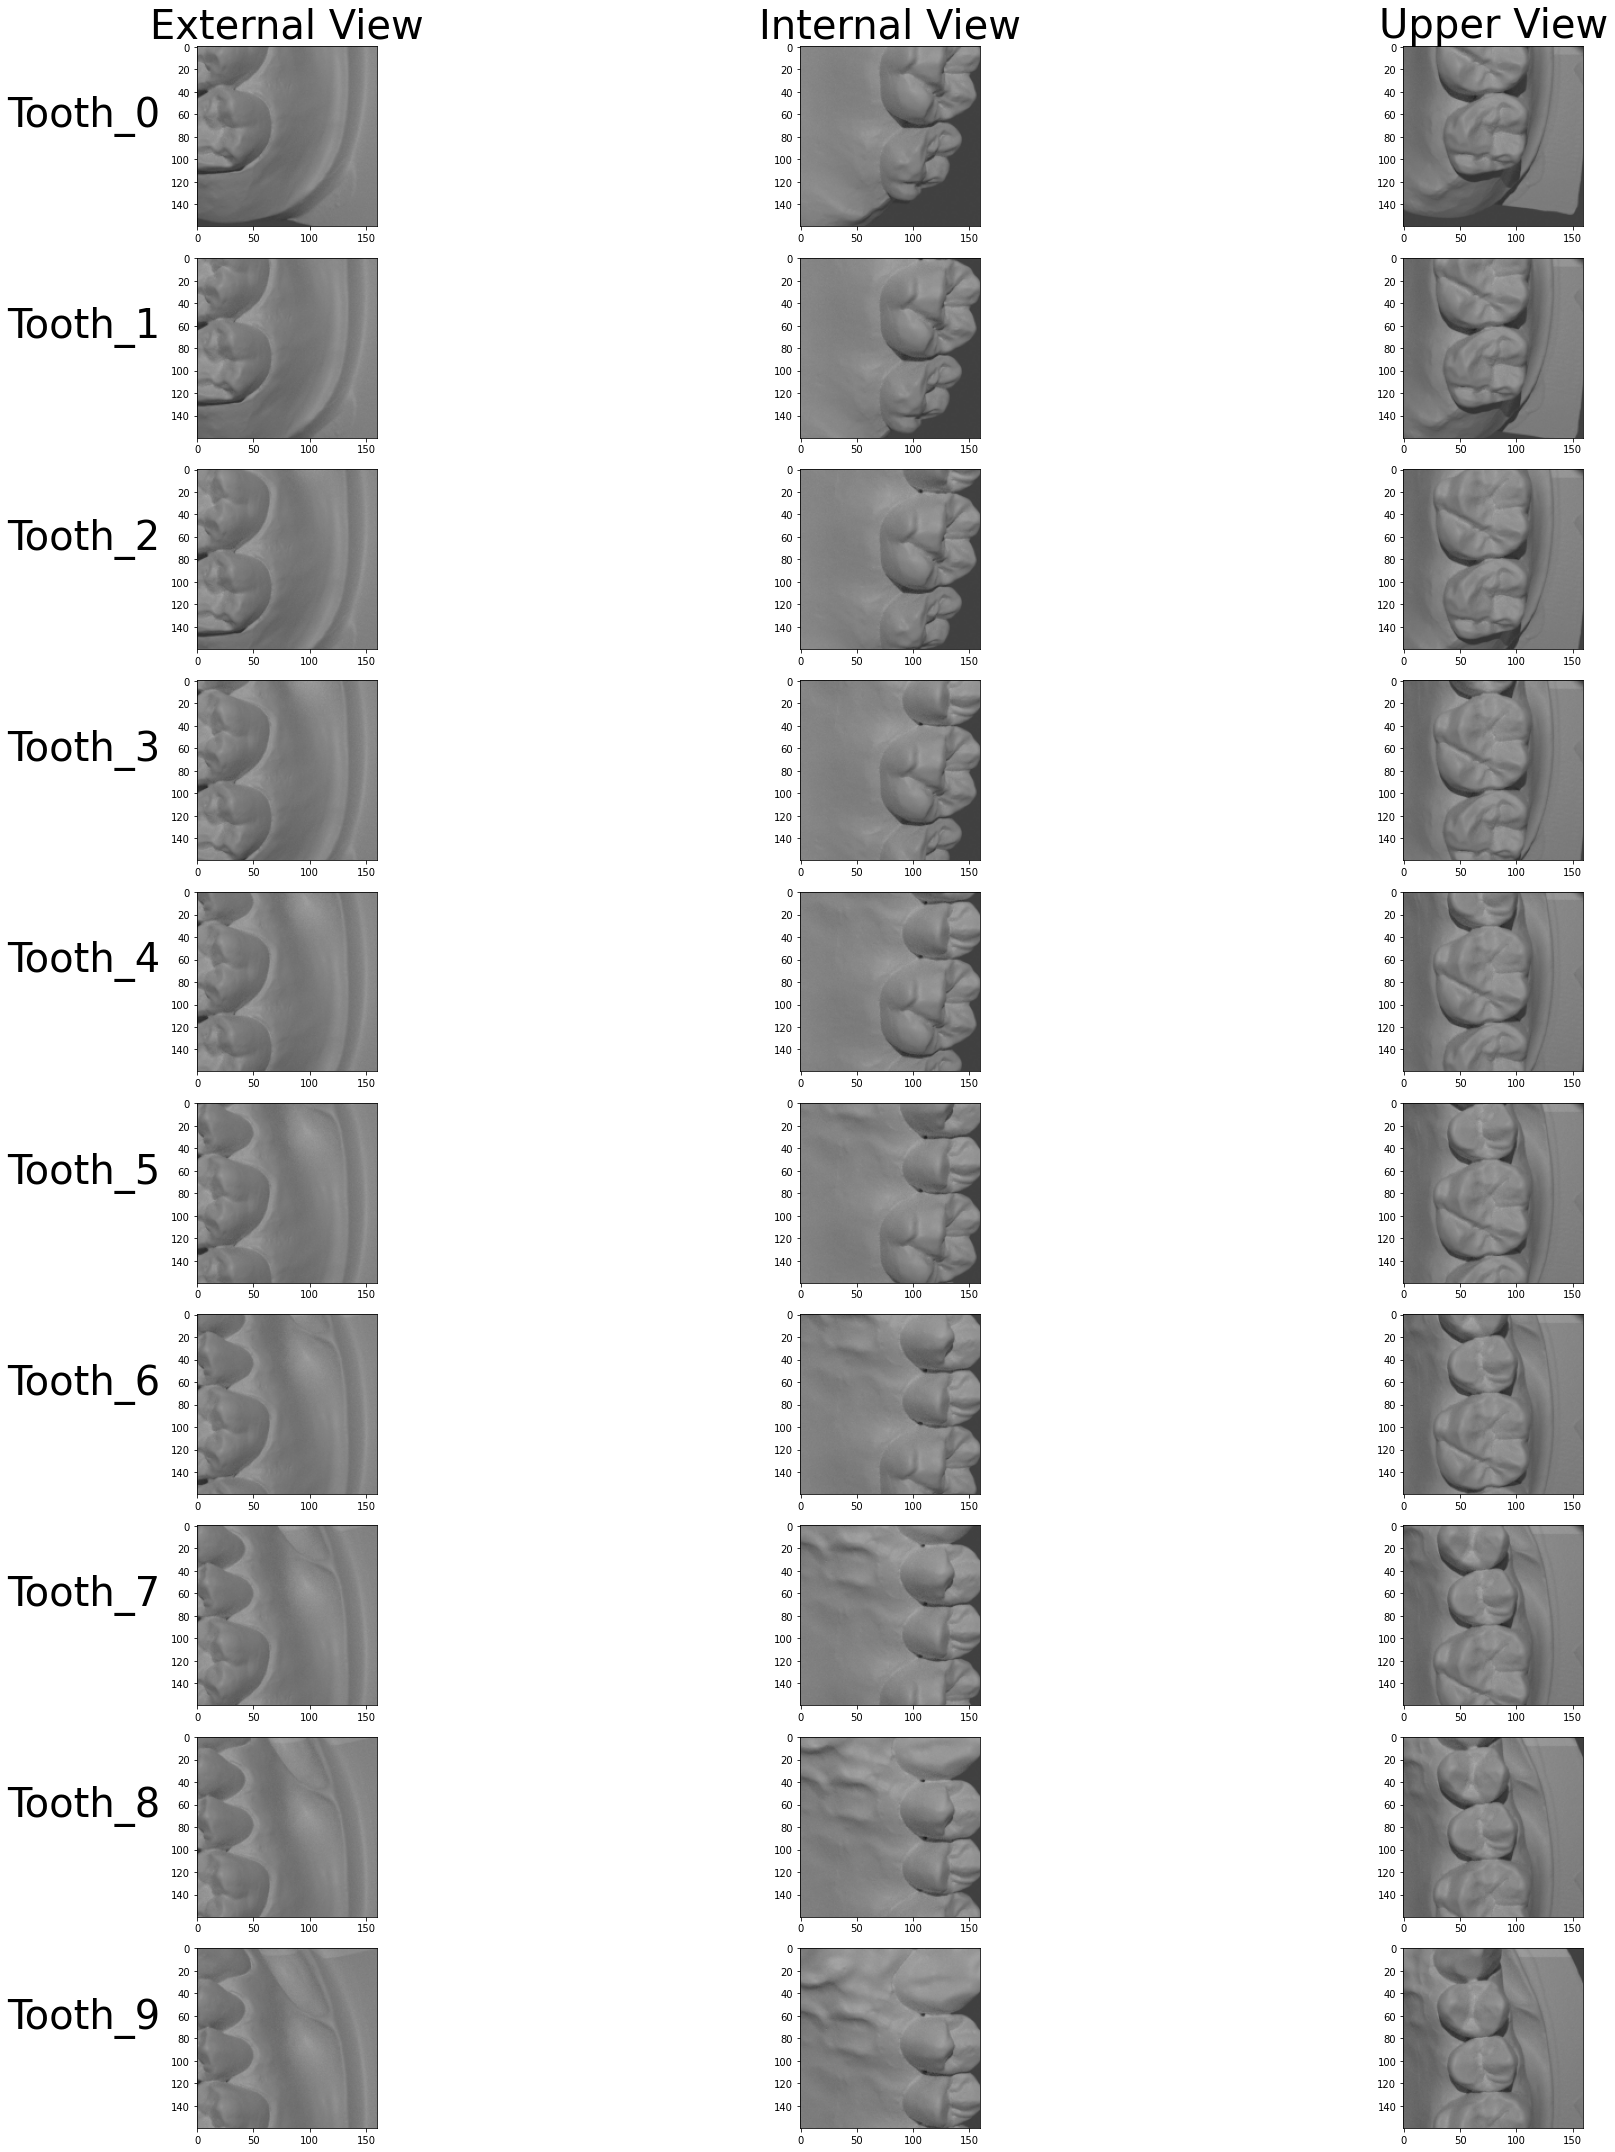

In [21]:
T = (0,10) # visualizing teeth from 5 to 9 
many_images= [external_img[T[0]:T[1]], internal_img[T[0]:T[1]], upper_img[T[0]:T[1]]] 
display_multiple_teeth(many_images,T, rows = len(external_img[T[0]:T[1]]), cols=len(many_images))

# Functions

In [64]:
%run "../Notebooks/Stitching_functions.ipynb"
%run "../Notebooks/Visualization_functions.ipynb"
%run "../Notebooks/Downsampling_and_outliers_functions.ipynb"
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
test_function()

available functions
-visualize_tooth(t)
-draw_registration_result(source, target, transformation, title = ) 
-preprocess_point_cloud(pcd, voxel_size,pprint_statements = False)
-prepare_dataset(source,target,voxel_size, trans_init = None,mytitle = , print_statements = False)
-execute_global_registration(source_down, target_down, source_fpfh,target_fpfh, 
voxel_size,print_statements = False)
-refine_registration(source, target,source_fpfh, target_fpfh,voxel_size,
mytranformation = None,print_statements = False):
-stitch_two_point_clouds(source, target,mytitle,dt_string,voxel_size,
calculate_global = True,calculate_icp = True,trans_init = None,pprint_statements = False,save_statements = True,visualization_on = False)
-save_registration_result(source, target, transformation,title,save_result = True,visualize_result = False)


# Load Point Clouds

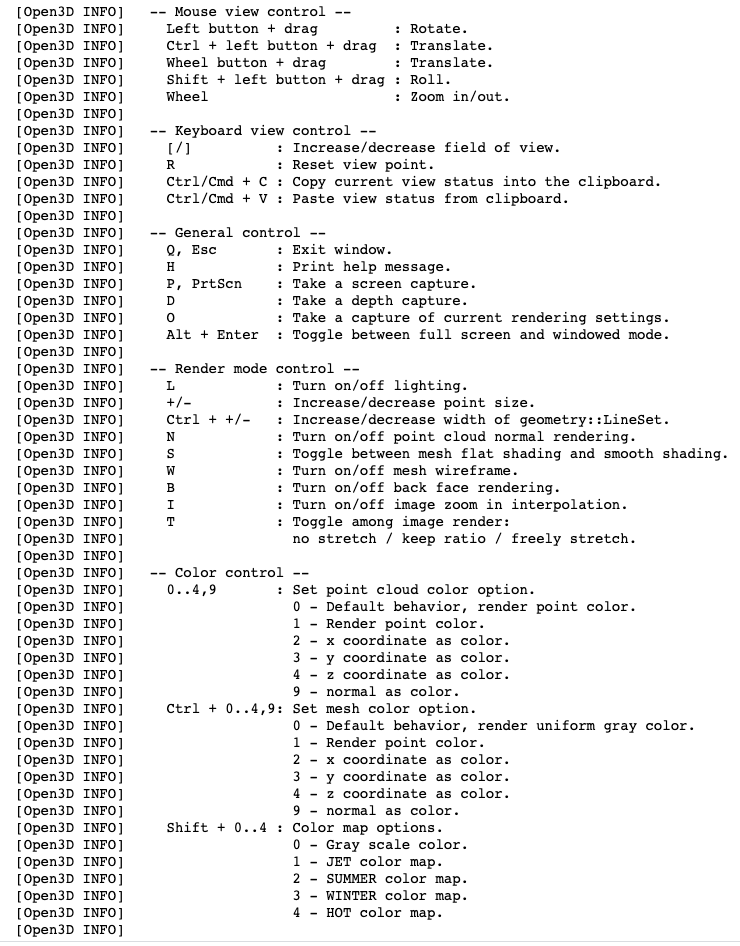

In [24]:
# instructions
Im(filename='instructions.png',
  width = 500) 

### load one point cloud 

In [25]:
#load one point cloud 
# http://www.open3d.org/docs/release/python_api/open3d.geometry.PointCloud.html
path = ply_folder+"/"+all_ply[20]
pcd = o3d.io.read_point_cloud(path)
print(pcd)
print(np.asarray(pcd.points))

PointCloud with 22217 points.
[[-10.407411 -10.407411  53.099034]
 [-10.271841 -10.401864  53.070736]
 [-10.138216 -10.39817   53.051888]
 ...
 [  3.092426  10.621811  54.878902]
 [  3.226965  10.622094  54.880359]
 [  3.361356  10.621886  54.879286]]


In [26]:
print(len(np.asarray(pcd.points)))

22217


### visualize point cloud- default function

In [27]:
#simple point cloud visualization 
### visualize point cloud- opens a pop up window
mytitle = "generic_visualization"
o3d.visualization.draw_geometries([pcd],
                                 width=1000, height=800,
                                window_name='%s'%(mytitle))

In [28]:
## stuff with timestamp
#!ls -lt

In [44]:
## show files in directory recenlty modified
!find . -mtime 0

.
./10012021-22h44m41s-stitch_allpc_downsampled_upper_external.pcd
./RenderOption_2021-01-11-12-22-53.json
./Screenshot 2021-01-08 at 11.30.28.png
./cropped.png
./ScreenCamera_2021-01-10-15-00-31.json
./RenderOption_2021-01-11-12-27-31.json
./DepthCamera_2021-01-10-22-37-11.json
./ScreenCamera_2021-01-10-16-10-04.json
./ScreenCamera_2021-01-08-10-35-04.json
./test_cloud.png
./ScreenCamera_2021-01-11-12-03-12.json
./RenderOption_2021-01-10-13-54-21.json
./instructions.png
./DepthCapture_2021-01-10-22-37-11.png
./ScreenCapture_2021-01-08-10-35-04.png
./ScreenCamera_2021-01-10-14-49-47.json
./ScreenCapture_2021-01-11-12-29-22.png
./ScreenCamera_2021-01-10-15-57-26.json
./Screenshot 2021-01-08 at 11.56.57.png
./Showing outliers (red) and inliers (gray) .png
./ScreenCamera_2021-01-11-12-22-52.json
./ScreenCamera_2021-01-11-12-29-22.json
./ScreenCapture_2021-01-11-12-03-11.png
./RenderOption_2021-01-10-14-28-07.json
./ScreenCapture_2021-01-11-12-06-34.png
./ScreenCamera_2021-01-10-14-21-14.j

In [40]:
# shows very last file
!ls -rt | tail -1

RenderOption_2021-01-11-12-27-31.json


In [31]:
# with glob 
import glob
newest = max(glob.iglob('./*'), key=os.path.getctime)
newest

'./RenderOption_2021-01-11-12-22-53.json'

Load configuration file:

In [32]:
configuration_file = newest # the configuration file gives the details of the shape eg light, thickness etc NOT the position (see below)
custom_draw_geometry_load_option(pcd, configuration_file)

### visualize point could -custom made


> Save configuration file as .json with O

> Save picture(png) and camera(json) with pov with P

## parameters initialization 

In [41]:
myparams = "./ScreenCamera_2021-01-11-12-06-34.json"  # parameter for camera point view, json file via pressing P
myconfiguration_file = "RenderOption_2021-01-11-12-22-53.json" # configuration file for properties, json file via pressing o


## good custom draw geometry (one point cloud)

In [34]:
# https://github.com/intel-isl/Open3D/issues/1483
custom_draw_geometry(pcd, # point cloud
                     params = myparams,  # parameter for camera point view, json file via pressing P
                     configuration_file = myconfiguration_file, # configuration file for properties, json file via pressing o
                     take_screen_shot = False,
                     rotate = False) # with rotate true the config arent read

loading parameters: 
  ./ScreenCamera_2021-01-11-12-06-34.json
loading configuration file: 
  RenderOption_2021-01-10-16-40-36.json


### downsampling

The higher the voxel size the less points we have. 

In [35]:
down_pcd = pcd.voxel_down_sample(voxel_size=0.3)
print ("number of points with voxel down sample" ,len(np.array(down_pcd.points)))
#o3d.visualization.draw_geometries([down_pcd.paint_uniform_color([0.8, 0.8, 0.8])])

number of points with voxel down sample 6371


### outlier removal

In [43]:
### Statistical oulier removal
# effect is to highlight the contours
# increasing the number of neightbors more outliers in the countours
# de creasing the number std_ratio gives wider contours
mytitle ="Statistical oulier removal"

my_nb_neighbors=100
my_std_ratio=0.01

parameters = (my_nb_neighbors,my_std_ratio)
parameters_labels = ("my_nb_neighbors","my_std_ratio")
mytuples = list(zip(parameters_labels,parameters))

cloud, ind = down_pcd.remove_statistical_outlier(nb_neighbors=my_nb_neighbors,
                                                std_ratio=my_std_ratio)
display_inlier_outlier(down_pcd, ind, mytitle, mytuples)

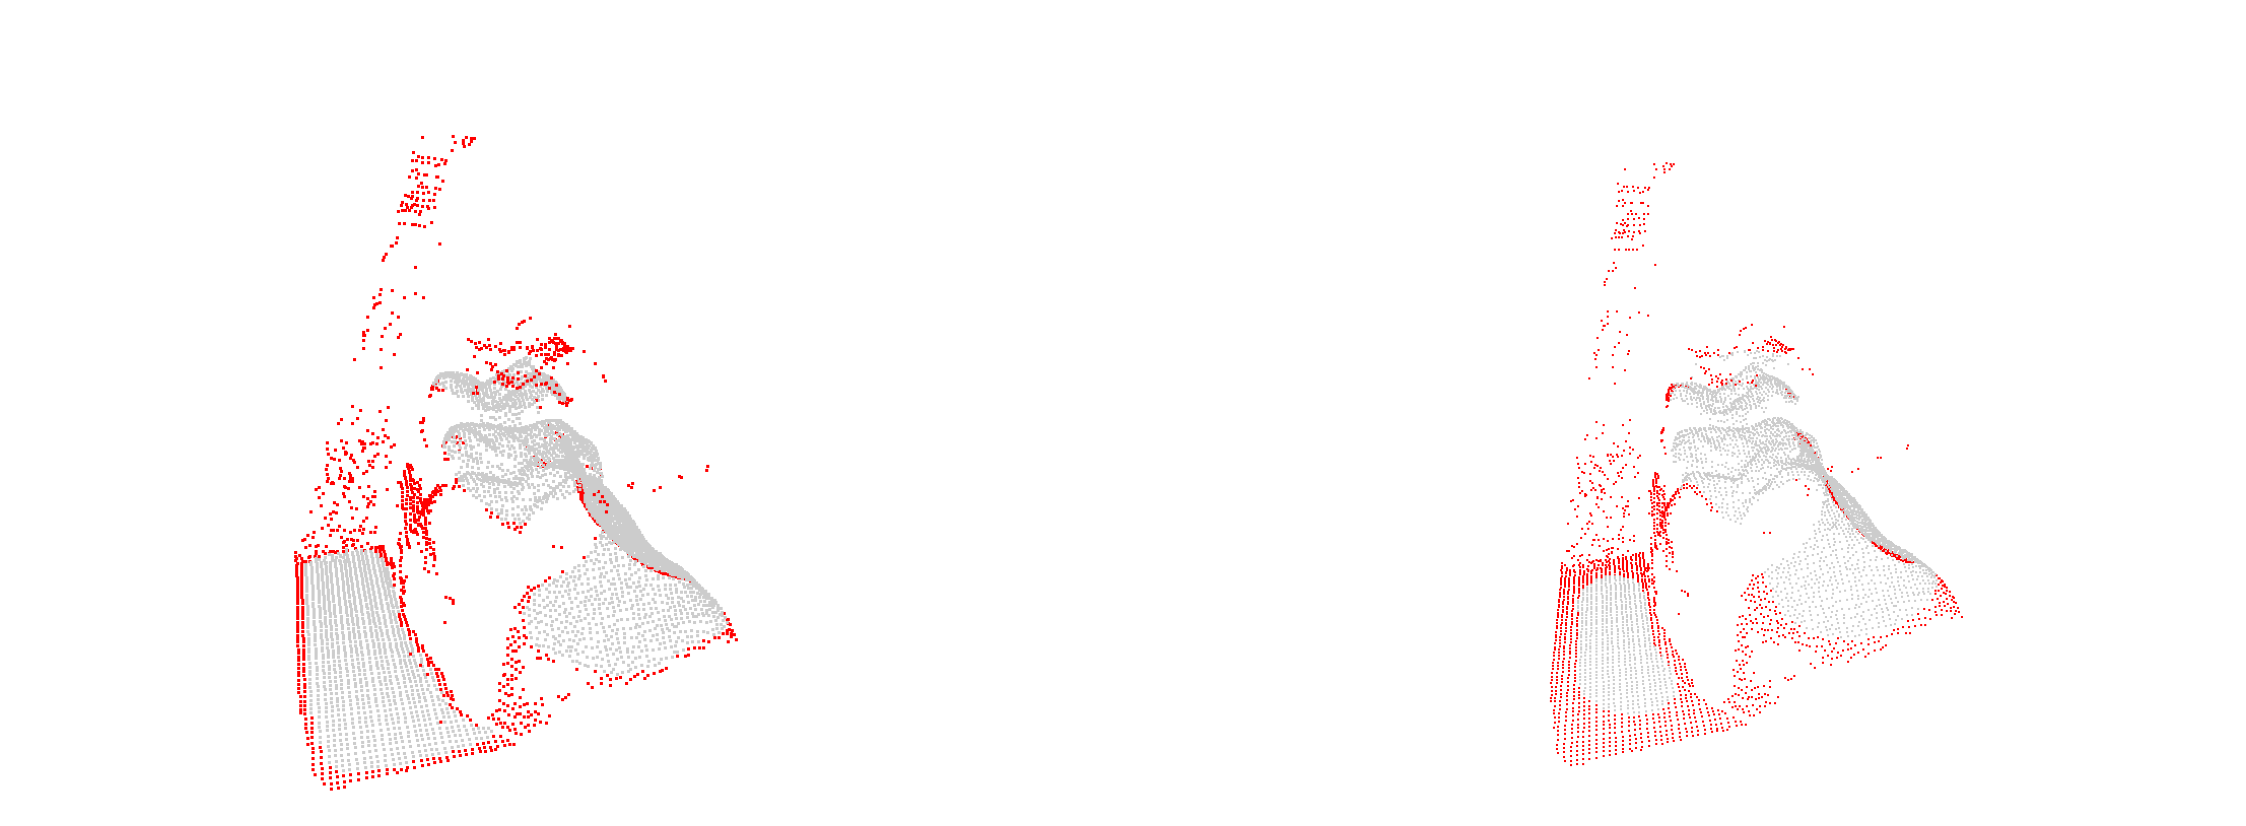

In [47]:
img_temp = list()
img_temp.append(cv2.imread('ScreenCapture_2021-01-11-12-28-43.png'))
img_temp.append(cv2.imread('ScreenCapture_2021-01-11-12-29-22.png'))


rows = 1
cols = 2
fig, axes = plt.subplots(nrows=rows,ncols=cols,squeeze=False,figsize=(40, 40))
for i in range(rows):
    for j in range(cols):
        axes[i][j].imshow(plt_format(img_temp[j]))
        axes[i][j].axis('off')

## custom visualization of outliers 

In [48]:
### Radius oulier removal
print("Radius oulier removal")
cl, ind = down_pcd.remove_radius_outlier(nb_points=10, radius=0.7)
display_inlier_outlier(down_pcd, ind)

Radius oulier removal


In [ ]:
#custom_draw_geometry(cl)

In [ ]:
#custom_draw_geometry_with_custom_fov(down_pcd, 30.0)

In [ ]:
#custom_draw_geometry_with_rotation(cl)

In [49]:
custom_draw_geometry_outliers(down_pcd, ind, 
                              mytitle = "Radius_oulier_removal", mytuples = mytuples,
                              params = myparams,  # parameter for camera point view, json file via pressing P
                              configuration_file = myconfiguration_file, # configuration file for properties, json file via pressing o
                              fov_step  = 15,
                              rotate = False)

loading parameters: 
  ./ScreenCamera_2021-01-11-12-06-34.json
Field of view (before changing) 60.00
Field of view (after changing) 75.00
loading configuration file: 
  RenderOption_2021-01-11-12-22-53.json


In [55]:
### hidden points removal
diameter = np.linalg.norm(
                          np.asarray(pcd.get_max_bound()) - np.asarray(pcd.get_min_bound()))
print (diameter)
print("Define parameters used for hidden_point_removal")
a = 0
b = 0
camera = [a, b, diameter]
radius = diameter * 200

print("Get all points that are visible from given view point")
pcd_clean, pt_map = pcd.hidden_point_removal(camera, radius)

#print("Visualize result")
custom_draw_geometry_outliers(pcd, pt_map, 
                              mytitle = "Radius_oulier_removal", mytuples = mytuples,
                              params = myparams,  # parameter for camera point view, json file via pressing P
                              configuration_file = myconfiguration_file, # configuration file for properties, json file via pressing o
                              fov_step  = 15,
                              rotate = True)

39.362430474859934
Define parameters used for hidden_point_removal
Get all points that are visible from given view point
loading parameters: 
  ./ScreenCamera_2021-01-11-12-06-34.json
Field of view (before changing) 60.00
Field of view (after changing) 75.00
loading configuration file: 
  RenderOption_2021-01-11-12-22-53.json
[Open3D WARNING] GLFW Error: The GLFW library is not initialized


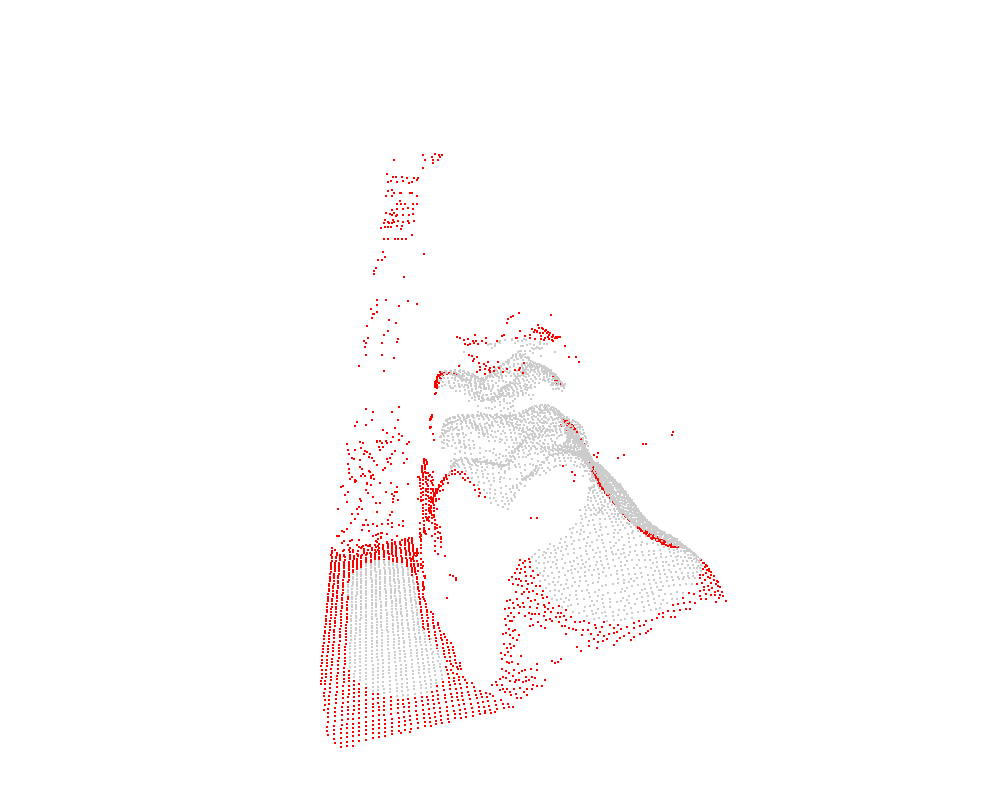

In [54]:
Im(filename='ScreenCapture_2021-01-11-12-29-22.png',
  width = 500, height = 400) 

### sets of Point Clouds

In [56]:
num_teeth = 10

external_ply = [o3d.io.read_point_cloud(path) for path in all_paths_ply[:num_teeth]]
internal_ply = [o3d.io.read_point_cloud(path) for path in all_paths_ply[num_teeth:2*num_teeth]]
upper_ply = [o3d.io.read_point_cloud(path) for path in all_paths_ply[-num_teeth:]]

In [57]:
# reverse in place the internal ones
internal_ply.reverse()

In [58]:
# create sets of three could per tooth
dictionary_pointclouds= { t: (external_ply[t],internal_ply[t],upper_ply[t]) for t in list(range(num_teeth))}
dictionary_pointclouds

{0: (PointCloud with 24775 points.,
  PointCloud with 20619 points.,
  PointCloud with 22217 points.),
 1: (PointCloud with 25350 points.,
  PointCloud with 22204 points.,
  PointCloud with 24173 points.),
 2: (PointCloud with 25371 points.,
  PointCloud with 23258 points.,
  PointCloud with 24667 points.),
 3: (PointCloud with 25508 points.,
  PointCloud with 23923 points.,
  PointCloud with 25044 points.),
 4: (PointCloud with 25547 points.,
  PointCloud with 24289 points.,
  PointCloud with 25115 points.),
 5: (PointCloud with 25545 points.,
  PointCloud with 24714 points.,
  PointCloud with 25123 points.),
 6: (PointCloud with 25549 points.,
  PointCloud with 24995 points.,
  PointCloud with 24966 points.),
 7: (PointCloud with 25591 points.,
  PointCloud with 24805 points.,
  PointCloud with 25156 points.),
 8: (PointCloud with 25590 points.,
  PointCloud with 24896 points.,
  PointCloud with 25036 points.),
 9: (PointCloud with 25590 points.,
  PointCloud with 24983 points.,
  Po

In [59]:
type(o3d.io.read_point_cloud(all_paths_ply[0]))

open3d.cpu.pybind.geometry.PointCloud

# stitching sequences 

being in sequence the overlapping in a proper stitching should be high.

Therefore we put a condition:
> while result_icp.correspondence_set < 0.7*(len(np.asarray(target.points)))
> do execute_global_registration
> do refine_registration

In [62]:
t = 0
list_new_pointclouds = []

now = datetime.now()
dt_string = now.strftime("%d%m%Y-%Hh%Mm%Ss")
print(dt_string)
mytitle = "imgs_%s"%t

for t in tqdm(list(range(9))):
    print(dash)
    mytitle = mytitle +"-%s"%(t+1)
    #print (mytitle)
    
    if len(list_new_pointclouds) == 0:
        source = external_ply[t]
    else:
        source = list_new_pointclouds[-1]
        
    target = external_ply[t+1]

    newpointcloud_last,trasformations_list = stitch_two_point_clouds(source,
                                        target,
                                        mytitle,
                                        dt_string,
                                        voxel_size =0.1,
                                        calculate_global = True,
                                        calculate_icp = True,
                                        trans_init = None,
                                        pprint_statements = True,
                                        save_statements = False,
                                        visualization_on = False,
                                        final_vis_on = False                                  
                                       )

    list_new_pointclouds.append(newpointcloud_last)

11012021-12h41m26s


  0%|          | 0/9 [00:00<?, ?it/s]

--------------------------------------------------------------------------------
stitching : imgs_0-1

outlier removal

dataset preparation
Load two point clouds and disturb initial pose.
removing outliers


number of points in clouds
(0, 23083)
(1, 24265)

GLOBAL REGISTRATION: RANSAC registration on downsampled point clouds.
Fit is:
<class 'open3d.cpu.pybind.pipelines.registration.RegistrationResult'>
RegistrationResult with fitness=2.001668e-02, inlier_rmse=9.436626e-02, and correspondence_set size of 96
Access transformation to get result.
Transformation is:
[[-2.07888326e-04  9.99966448e-01 -8.18905228e-03  1.99162857e+00]
 [ 3.91626398e-03  8.18980378e-03  9.99958794e-01 -1.20113155e-01]
 [ 9.99992310e-01  1.75809269e-04 -3.91783514e-03 -5.32489362e-03]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


number of points in clouds
(0, 23083)
(1, 24265)
overlapping points :  96

POINT-TO-PLANE ICP registration is applied on original point
distance threshold 0.200.

Fit is:
RegistrationResult with fitness=6.188195e-01, inlier_rmse=6.053352e-02, and correspondence_set size of 86407
Access transformation to get result.
Transformation is:
[[-2.60866915e-04  9.99999812e-01  5.55181596e-04  2.02134957e+00]
 [ 4.06356794e-04 -5.55075564e-04  9.99999763e-01 -2.12938899e-02]
 [ 9.99999883e-01  2.61092455e-04 -4.06211917e-04  4.53190761e-03]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


number of points in clouds
(0, 139632)
(1, 23453)
overlapping points :  86407
--------------------------------------------------------------------------------
stitching : imgs_0-1-2-3-4-5-6-7

outlier removal

dataset preparation
Load two point clouds and disturb initial pose.
removing outliers


number of points in clouds
(0, 162589)
(1, 23174)

GLOBAL REGISTRATION: RANSAC registration on downsampled point clouds.
Fit is:
<class 'open3d.cpu.pybind.pipelines.registration.RegistrationResult'>
RegistrationResult with fitness=1.707907e-02, inlier_rmse=9

In [ ]:
o3d.visualization.draw_geometries([list_new_pointclouds[-1]])

In [63]:
custom_draw_geometry(list_new_pointclouds[-1],
                     params = myparams,  # parameter for camera point view, json file via pressing P
                     configuration_file = myconfiguration_file, # configuration file for properties, json file via pressing o
                     take_screen_shot = False,
                     rotate = True)

loading parameters: 
  ./ScreenCamera_2021-01-11-12-06-34.json
loading configuration file: 
  RenderOption_2021-01-11-12-22-53.json
[Open3D WARNING] GLFW Error: The GLFW library is not initialized


In [65]:
stitched_external_pc = list_new_pointclouds[-1]

In [66]:
t = 0
list_new_pointclouds = []

now = datetime.now()
dt_string = now.strftime("%d%m%Y-%Hh%Mm%Ss")
print(dt_string)
mytitle = "imgs_%s"%t

for t in tqdm(list(range(9))):
    print(dash)
    mytitle = mytitle +"-%s"%(t+1)
    #print (mytitle)
    
    if len(list_new_pointclouds) == 0:
        source = upper_ply[t]
    else:
        source = list_new_pointclouds[-1]
    target = upper_ply[t+1]

    newpointcloud_last,trasformations_list = stitch_two_point_clouds(source,
                                        target,
                                        mytitle,
                                        dt_string,
                                        voxel_size =0.1,
                                        calculate_global = True,
                                        calculate_icp = True,
                                        trans_init = None,
                                        pprint_statements = False,
                                        save_statements = False,
                                        visualization_on = False,
                                        final_vis_on = False,
                                        mmax_iteration = 10**6,
                                        mmax_validation = 0.7
                                       )

    list_new_pointclouds.append(newpointcloud_last)

11012021-12h50m21s


  0%|          | 0/9 [00:00<?, ?it/s]

--------------------------------------------------------------------------------
stitching : imgs_0-1



--------------------------------------------------------------------------------
stitching : imgs_0-1-2



--------------------------------------------------------------------------------
stitching : imgs_0-1-2-3



--------------------------------------------------------------------------------
stitching : imgs_0-1-2-3-4



--------------------------------------------------------------------------------
stitching : imgs_0-1-2-3-4-5



--------------------------------------------------------------------------------
stitching : imgs_0-1-2-3-4-5-6



--------------------------------------------------------------------------------
stitching : imgs_0-1-2-3-4-5-6-7



--------------------------------------------------------------------------------
stitching : imgs_0-1-2-3-4-5-6-7-8



--------------------------------------------------------------------------------
stitching : imgs_0-1-2-

In [67]:
#o3d.visualization.draw_geometries([list_new_pointclouds[-1]])
custom_draw_geometry(list_new_pointclouds[-1],
                     params = myparams,  # parameter for camera point view, json file via pressing P
                     configuration_file = myconfiguration_file, # configuration file for properties, json file via pressing o
                     take_screen_shot = False,
                     rotate = True)

loading parameters: 
  ./ScreenCamera_2021-01-11-12-06-34.json
loading configuration file: 
  RenderOption_2021-01-11-12-22-53.json
[Open3D WARNING] GLFW Error: The GLFW library is not initialized


In [68]:
stitched_upper_pc = list_new_pointclouds[-1]

In [81]:
dt_string

'11012021-13h01m00s'

In [70]:
t = 0
list_new_pointclouds = []

now = datetime.now()
dt_string = now.strftime("%d%m%Y-%Hh%Mm%Ss")
print(dt_string)
mytitle = "imgs_%s"%t

for t in tqdm(list(range(9))):
    print(dash)
    mytitle = mytitle +"-%s"%(t+1)
    #print (mytitle)
    
    if len(list_new_pointclouds) == 0:
        source = internal_ply[t]
    else:
        source = list_new_pointclouds[-1]
    target = internal_ply[t+1]

    newpointcloud_last,trasformations_list = stitch_two_point_clouds(source,
                                        target,
                                        mytitle,
                                        dt_string,
                                        voxel_size =0.1,
                                        calculate_global = True,
                                        calculate_icp = True,
                                        trans_init = None,
                                        pprint_statements = False,
                                        save_statements = False,
                                        visualization_on = False,
                                        final_vis_on = False,
                                        mmax_iteration = 10**5,
                                        mmax_validation = 0.5
                                       )

    list_new_pointclouds.append(newpointcloud_last)

11012021-13h01m00s


  0%|          | 0/9 [00:00<?, ?it/s]

--------------------------------------------------------------------------------
stitching : imgs_0-1



--------------------------------------------------------------------------------
stitching : imgs_0-1-2



--------------------------------------------------------------------------------
stitching : imgs_0-1-2-3



--------------------------------------------------------------------------------
stitching : imgs_0-1-2-3-4



--------------------------------------------------------------------------------
stitching : imgs_0-1-2-3-4-5



--------------------------------------------------------------------------------
stitching : imgs_0-1-2-3-4-5-6



--------------------------------------------------------------------------------
stitching : imgs_0-1-2-3-4-5-6-7



--------------------------------------------------------------------------------
stitching : imgs_0-1-2-3-4-5-6-7-8









--------------------------------------------------------------------------------
stitching : imgs_

In [72]:
#o3d.visualization.draw_geometries([list_new_pointclouds[-1]])
stitched_internal_pc = list_new_pointclouds[-1]
custom_draw_geometry(stitched_internal_pc,
                     params = myparams,  # parameter for camera point view, json file via pressing P
                     configuration_file = myconfiguration_file, # configuration file for properties, json file via pressing o
                     take_screen_shot = False,
                     rotate = True)

loading parameters: 
  ./ScreenCamera_2021-01-11-12-06-34.json
loading configuration file: 
  RenderOption_2021-01-11-12-22-53.json
[Open3D WARNING] GLFW Error: The GLFW library is not initialized


## results visualizations

In [77]:
# all together, static
o3d.visualization.draw_geometries([stitched_external_pc.paint_uniform_color([0.5, 0, 0]),
                                   stitched_internal_pc.paint_uniform_color([0, 0.5, 0]),
                                   stitched_upper_pc.paint_uniform_color([0, 0, 0.5])
                                    ],
                                  width=1000, height=800,
                                  window_name='3 raw views of tooth %s'%t
                                 )

In [78]:
# sequential, dynamic
labels_stitches = ["stitched_external_pc","stitched_internal_pc", "stitched_upper_pc"]
list_stitches = [stitched_external_pc,stitched_internal_pc,stitched_upper_pc]
color_stitches = [[1, 0.706, 0],[0, 0.651, 0.929],[0,0.7,0.3]]

# plot a list of geometries
custom_draw_geometry([list_stitches[:]],
                     mytitle = [labels_stitches[:]],
                     params = myparams,  # parameter for camera point view, json file via pressing P
                     configuration_file = myconfiguration_file, # configuration file for properties, json file via pressing o
                     take_screen_shot = False,
                     rotate = True)

loading parameters: 
  ./ScreenCamera_2021-01-11-12-06-34.json
loading configuration file: 
  RenderOption_2021-01-11-12-22-53.json
[Open3D WARNING] GLFW Error: The GLFW library is not initialized
loading parameters: 
  ./ScreenCamera_2021-01-11-12-06-34.json
loading configuration file: 
  RenderOption_2021-01-11-12-22-53.json
[Open3D WARNING] GLFW Error: The GLFW library is not initialized
loading parameters: 
  ./ScreenCamera_2021-01-11-12-06-34.json
loading configuration file: 
  RenderOption_2021-01-11-12-22-53.json
[Open3D WARNING] GLFW Error: The GLFW library is not initialized


## store pc

official and backup with timestamp

In [83]:
#save
o3d.io.write_point_cloud(dt_string+"stitched_external_pc.pcd", stitched_external_pc)
o3d.io.write_point_cloud(dt_string+"stitched_internal_pc.pcd", stitched_internal_pc)
o3d.io.write_point_cloud(dt_string+"stitched_upper_pc.pcd", stitched_upper_pc)
o3d.io.write_point_cloud("stitched_external_pc.pcd", stitched_external_pc)
o3d.io.write_point_cloud("stitched_internal_pc.pcd", stitched_internal_pc)
o3d.io.write_point_cloud("stitched_upper_pc.pcd", stitched_upper_pc)


True